# Based on our final diet

Diet (in 100s of grams):

Crunchy Peanut Butter Salted    3.057834    (Peanut Butter)

Shredded Mozzarella Cheese      1.057181    (Mozzarella Cheese)

Jasmine Rice From Thailand      0.088509    (Rice)

Joe's O's Cereal                0.272160    (Cereal)

Calrose Rice                    0.345628    (Rice)


In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [57]:
food_price = pd.read_csv("./data/prices from different stores - Sheet1.csv")
food_price.head()

,Food name,Price at TJs ($),Quantity,Unit,Brand/Type at TJs,Price at Safeway ($),Quantity.1,Unit.1,Brand/Type at Safeway,Price at Berkeley Bowl ($),Quantity.2,Unit.2,Brand/Type at Berkeley Bowl,Price at Whole Foods ($),Quantity.3,Unit.3,Brand/Type at Whole Foods
0,Peanut Butter,2.49,16,oz,Crunchy Peanut Butter Salted,8.99,40,oz,SKIPPY Peanut Butter Spread Creamy,7.19,16,oz,Peanut Butter & Co Simply Smooth Peanut Butter...,4.49,16,oz,"Organic Peanut Butter, Creamy"
1,Shredded Mozzarella Cheese,4.49,16,oz,Shredded Mozzarella Cheese,4.49,8,oz,Lucerne Mozzarella Provolon Cheese Shred,6.59,8,oz,Tillamook Mozzarella Shredded Cheese,5.99,16,oz,Part-skim Shredded Mozzarella Cheese
2,Jasmine Rice,3.39,3,lb,Jasmine Rice From Thailand,9.99,5,lb,Golden Star Thai Hom Mali Jasmine Rice,2.09,1,lb,Thai Jasmine Rice,9.49,2,lb,"Organic California White Jasmine Rice, 32 oz"
3,Cereal,1.99,12,oz,Joe's O's Cereal,8.99,23,oz,Kellogg's Froot Loops Original Fruit Flavored ...,8.79,29,oz,Post Grape Nuts Cereal,6.29,14,oz,"Golean Crunch Honey Almond Flax Cereal, 14 oz"
4,Calrose Rice,2.49,2,lb,Calrose Rice,9.79,5,lb,Hinode Rice White Calrose Medium Grain - 5 Lb,10.99,5,lb,Botan Calrose Rice,10.49,5,lb,"Calrose Rice, 5 lbs"


In [58]:
# Dictionary for unit conversion (converting all units to grams)
unit_to_gram = {
    'lb': 453.592,  # 1 pound (lb) = 453.592 grams
    'oz': 28.35,    # 1 ounce (oz) = 28.35 grams
    'g': 1,         # 1 gram (g) = 1 gram
    'kg': 1000      # 1 kilogram (kg) = 1000 grams
}

# List of stores to process
stores = ["TJs", "Safeway", "Berkeley Bowl", "Whole Foods"]

# Dictionary mapping store names to their respective price, quantity, and unit columns in the dataset
price_columns = {
    "TJs": ("Price at TJs ($)", "Quantity", "Unit"),
    "Safeway": ("Price at Safeway ($)", "Quantity.1", "Unit.1"),
    "Berkeley Bowl": ("Price at Berkeley Bowl ($)", "Quantity.2", "Unit.2"),
    "Whole Foods": ("Price at Whole Foods ($)", "Quantity.3", "Unit.3")
}

# Convert all price values to a standardized "price per 100g"
for store, (price_col, qty_col, unit_col) in price_columns.items():
    # Strip any whitespace from unit column
    food_price[unit_col] = food_price[unit_col].str.strip()
    
    # Compute price per 100g for each store
    food_price[f"{store} per 100g"] = food_price.apply(
        lambda row: (row[price_col] / (row[qty_col] * unit_to_gram[row[unit_col]])) * 100
        if row[unit_col] in unit_to_gram else None, axis=1
    )

# Create a new DataFrame containing only the relevant columns: food names and prices per 100g for each store
price_vs = food_price[["Food name"] + [f"{store} per 100g" for store in stores]]


In [59]:
price_vs.head()

,Food name,TJs per 100g,Safeway per 100g,Berkeley Bowl per 100g,Whole Foods per 100g
0,Peanut Butter,0.548942,0.792769,1.585097,0.989859
1,Shredded Mozzarella Cheese,0.989859,1.979718,2.905644,1.320547
2,Jasmine Rice,0.249123,0.440484,0.460767,1.046094
3,Cereal,0.584950,1.378729,1.069148,1.584782
4,Calrose Rice,0.274476,0.431665,0.484576,0.462530


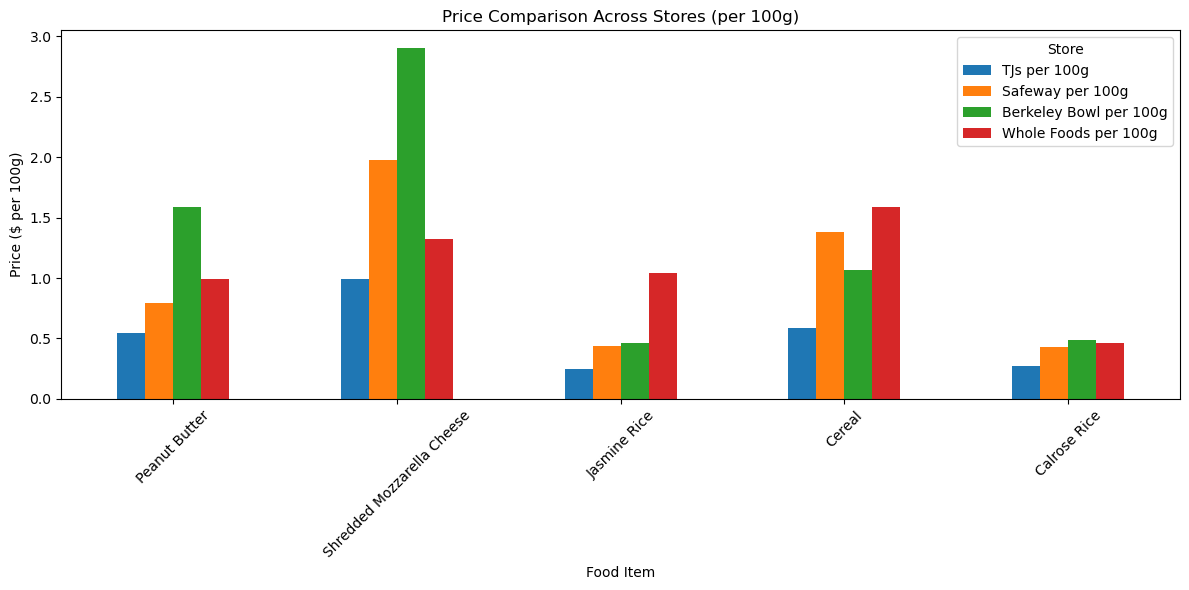

In [60]:
# compare food prices per 100g across different stores
price_vs.set_index("Food name").plot(kind="bar", figsize=(12, 6))
plt.title("Price Comparison Across Stores (per 100g)")
plt.ylabel("Price ($ per 100g)")
plt.xlabel("Food Item")
plt.xticks(rotation=45)
plt.legend(title="Store")
plt.tight_layout()
plt.show()